In [1]:
import pandas as pd

## MEASURING MOVIE "POPULARITY" WITH SCATTER PLOT

Combined imdb.title.ratings and imdb.title.basics to draw a comparison between the average movie rating, and the number of times it was rated. I then made a scatter plot to assess if there is a correlation between the two, to gather insight on whether the number of ratings is a measure of popularity.

In [2]:
rotten = pd.read_csv('rt.movie_info.tsv.gz', delimiter="\t")
#initialized a dataframe to access a database containing rotten tomatos reviews

In [3]:
rtreviews = pd.read_csv('rt.reviews.tsv.gz', sep="\t", encoding='latin-1')

In [4]:
imdbreviews = pd.read_csv("imdb.title.ratings.csv.gz")

In [5]:
basics = pd.read_csv('imdb.title.basics.csv.gz')

In [6]:
imdbreviews.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
imdb = basics.merge(imdbreviews, on="tconst", how="inner")

In [9]:
imdb.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [10]:
imdb

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [11]:
imdb = imdb.drop_duplicates(subset=["primary_title"])

In [12]:
imdb.head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [13]:
imdb["primary_title"].describe()

count              69993
unique             69993
top       Elf on the Run
freq                   1
Name: primary_title, dtype: object

In [14]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Movie Popularity: Rating vs # of Times Rated')

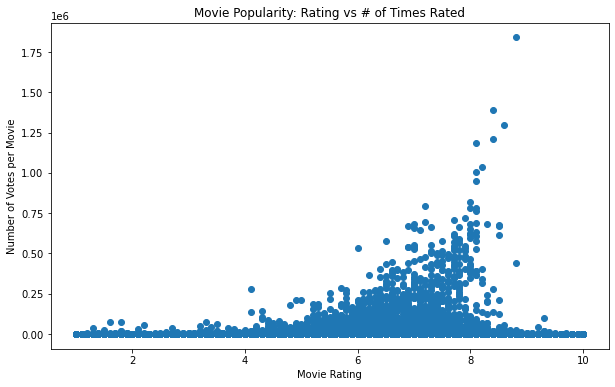

In [15]:
scatter_title = "Movie Popularity: Rating vs # of Times Rated"
xlabel = "Movie Rating"
ylabel = "Number of Votes per Movie"

imdb_pop, ax = plt.subplots(figsize=(10,6))
xx=imdb["averagerating"]
yy=imdb["numvotes"]

ax.scatter(xx,yy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)

## END POPULARITY MEASURING HERE

## BEGIN: RELATIONSHIP BETWEEN BUDGET AND AVG MOVIE RATING

In [16]:
budgetinfo = pd.read_csv("tn.movie_budgets.csv.gz")
#import budget numbers

In [17]:
budgetinfo.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
#rewrite the release_date to isolate the year in the release date
budgetinfo['release_date'] = budgetinfo['release_date'].str[-4:]

In [19]:
#dropping the dollar sign in the production_budget numbers
budgetinfo['production_budget'] = budgetinfo['production_budget'].str.replace('$', '')
#dropping the commas in production_budget numbers
budgetinfo['production_budget'] = budgetinfo['production_budget'].str.replace(',', '')

In [20]:
budgetinfo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,3,2019,Dark Phoenix,350000000,"$42,762,350","$149,762,350"
3,4,2015,Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000,$0,$0
5778,79,1999,Following,6000,"$48,482","$240,495"
5779,80,2005,Return to the Land of Wonders,5000,"$1,338","$1,338"
5780,81,2015,A Plague So Pleasant,1400,$0,$0


In [21]:
#dropping the dollar sign and commas in the domestic_gross numbers
budgetinfo['domestic_gross'] = budgetinfo['domestic_gross'].str.replace('$', '')
budgetinfo['domestic_gross'] = budgetinfo['domestic_gross'].str.replace(',', '')
#dropping the dollar sign and commas in the worldwide_gross numbers
budgetinfo['worldwide_gross'] = budgetinfo['worldwide_gross'].str.replace('$', '')
budgetinfo['worldwide_gross'] = budgetinfo['worldwide_gross'].str.replace(',', '')
budgetinfo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000,760507625,2776345279
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019,Dark Phoenix,350000000,42762350,149762350
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000,0,0
5778,79,1999,Following,6000,48482,240495
5779,80,2005,Return to the Land of Wonders,5000,1338,1338
5780,81,2015,A Plague So Pleasant,1400,0,0


In [22]:
#convert altered numbers to floats
budgetinfo['worldwide_gross'] = budgetinfo['worldwide_gross'].astype(float)
budgetinfo['production_budget'] = budgetinfo['production_budget'].astype(float)
budgetinfo['domestic_gross'] = budgetinfo['domestic_gross'].astype(float)
budgetinfo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999,Following,6000.0,48482.0,2.404950e+05
5779,80,2005,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015,A Plague So Pleasant,1400.0,0.0,0.000000e+00


We have successfully imported the budget information and converted the columns to workable numbers.

Now, we are going to create an ID column that will allow us to combine the IMDB data with the BudgetInfo data frame.

In [23]:
budgetinfo["merge_id"] = budgetinfo["release_date"] + " " + budgetinfo["movie"]

In [24]:
budgetinfo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,merge_id
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09,2009 Avatar
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011 Pirates of the Caribbean: On Stranger Tides
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019 Dark Phoenix
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015 Avengers: Age of Ultron
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017 Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...
5777,78,2018,Red 11,7000.0,0.0,0.000000e+00,2018 Red 11
5778,79,1999,Following,6000.0,48482.0,2.404950e+05,1999 Following
5779,80,2005,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005 Return to the Land of Wonders
5780,81,2015,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015 A Plague So Pleasant


In [25]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [26]:
imdb["merge_id"] = imdb["start_year"].astype(str) + " " + imdb["primary_title"]
imdb

<ipython-input-26-8cd98a71fbf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb["merge_id"] = imdb["start_year"].astype(str) + " " + imdb["primary_title"]


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,merge_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2013 Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,2019 One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018 The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,2018 Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,2017 The Wandering Soap Opera
...,...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,2019 Padmavyuhathile Abhimanyu
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,2019 Swarm Season
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,2019 Diabolik sono io
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,2019 Sokagin Çocuklari


In [27]:
imdb.to_csv('imdb_merge.csv')

In [28]:
#locating documentaries in pre-merge
imdb.loc[imdb["genres"] == "Documentary"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,merge_id
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,2013 Cooper and Hemingway: The True Gen
11,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6,2018 T.G.M. - osvoboditel
20,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,Documentary,7.8,22,2012 Akakis mogzauroba
26,tt0285423,Abolição,Abolição,2019,NaN,Documentary,7.4,35,2019 Abolição
73,tt0417750,Hempsters: Plant the Seed,Hempsters: Plant the Seed,2010,90.0,Documentary,7.5,107,2010 Hempsters: Plant the Seed
...,...,...,...,...,...,...,...,...,...
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,NaN,Documentary,8.7,10,2019 Band Together with Logic
73840,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218,2019 Ott Tänak: The Movie
73843,tt9905476,Hand Rolled,Hand Rolled,2019,90.0,Documentary,9.3,13,2019 Hand Rolled
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,2019 Swarm Season


In [29]:
budgetinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   merge_id           5782 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 316.3+ KB


In [30]:
#We now have created a matching merge_id for both IMDB and BudgetInfo data frames. We will now combine these two data frames

In [31]:
movie_data = imdb.set_index("merge_id").join(budgetinfo.set_index("merge_id"),how="inner")

In [32]:
movie_data=movie_data.reset_index()

In [33]:
movie_data

,merge_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2010 127 Hours,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama",7.6,323949,6,2010,127 Hours,18000000.0,18335230.0,6.021717e+07
1,2010 8: The Mormon Proposition,tt1484522,8: The Mormon Proposition,8: The Mormon Proposition,2010,80.0,Documentary,7.0,1190,38,2010,8: The Mormon Proposition,2500000.0,100280.0,1.002800e+05
2,2010 A Nightmare on Elm Street,tt1179056,A Nightmare on Elm Street,A Nightmare on Elm Street,2010,95.0,"Crime,Drama,Horror",5.2,85497,49,2010,A Nightmare on Elm Street,35000000.0,63075011.0,1.177296e+08
3,2010 Alice in Wonderland,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",6.5,358813,51,2010,Alice in Wonderland,200000000.0,334191110.0,1.025491e+09
4,2010 All Good Things,tt1175709,All Good Things,All Good Things,2010,101.0,"Crime,Drama,Mystery",6.3,49684,96,2010,All Good Things,20000000.0,582024.0,8.736170e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,2019 UglyDolls,tt1946502,UglyDolls,UglyDolls,2019,87.0,"Adventure,Animation,Comedy",4.5,1176,6,2019,UglyDolls,45000000.0,19894664.0,2.464466e+07
1367,2019 Unplanned,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",6.3,5945,33,2019,Unplanned,6000000.0,18107621.0,1.810762e+07
1368,2019 Velvet Buzzsaw,tt7043012,Velvet Buzzsaw,Velvet Buzzsaw,2019,113.0,"Horror,Mystery,Thriller",5.7,40213,82,2019,Velvet Buzzsaw,21000000.0,0.0,0.000000e+00
1369,2019 What Men Want,tt7634968,What Men Want,What Men Want,2019,117.0,"Comedy,Fantasy,Romance",4.9,10141,21,2019,What Men Want,20000000.0,54611903.0,6.991190e+07


In [34]:
movie_data = movie_data[["tconst","merge_id","release_date","genres","averagerating","numvotes","production_budget","domestic_gross","worldwide_gross"]]

In [35]:
movie_data.to_csv('movie_data.csv')

Text(0.5, 1.0, 'Production Budget vs Rating')

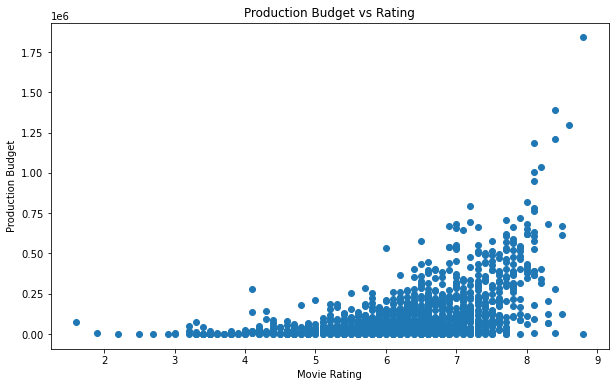

In [36]:
#see if there is an existing relationship between average rating and the production budget

scatter_title = "Production Budget vs Rating"
xlabel = "Movie Rating"
ylabel = "Production Budget"

productionrating, ax = plt.subplots(figsize=(10,6))
xxx=movie_data["averagerating"]
yyy=movie_data["numvotes"]

ax.scatter(xxx,yyy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)

In [37]:
#Run correlation number 0-1
movie_data.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
averagerating,1.000000,0.501088,0.224294,0.323762,0.305280
numvotes,0.501088,1.000000,0.543450,0.668041,0.653669
production_budget,0.224294,0.543450,1.000000,0.710999,0.785045
domestic_gross,0.323762,0.668041,0.710999,1.000000,0.943440
worldwide_gross,0.305280,0.653669,0.785045,0.943440,1.000000


Text(0.5, 1.0, 'Production Budget vs Domestic Gross')

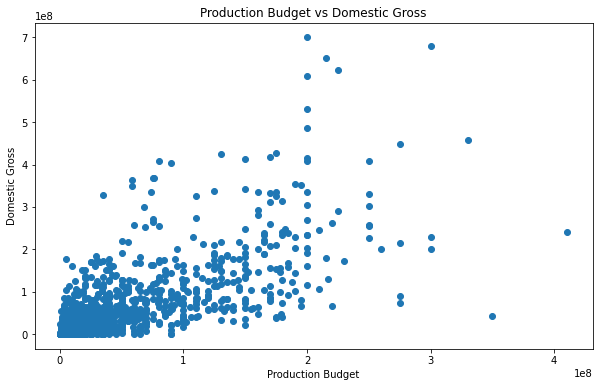

In [38]:
#compare production budget to domestic gross
scatter_title = "Production Budget vs Domestic Gross"
ylabel = "Domestic Gross"
xlabel = "Production Budget"

productiondomestic, ax = plt.subplots(figsize=(10,6))
yyyy=movie_data["domestic_gross"]
xxxx=movie_data["production_budget"]

ax.scatter(xxxx,yyyy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)

In [39]:
movie_data

,tconst,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
0,tt1542344,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07
1,tt1484522,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05
2,tt1179056,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08
3,tt1014759,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09
4,tt1175709,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05
...,...,...,...,...,...,...,...,...,...
1366,tt1946502,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07
1367,tt9024106,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07
1368,tt7043012,2019 Velvet Buzzsaw,2019,"Horror,Mystery,Thriller",5.7,40213,21000000.0,0.0,0.000000e+00
1369,tt7634968,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07


Text(0.5, 1.0, 'Production Budget vs Worldwide Gross')

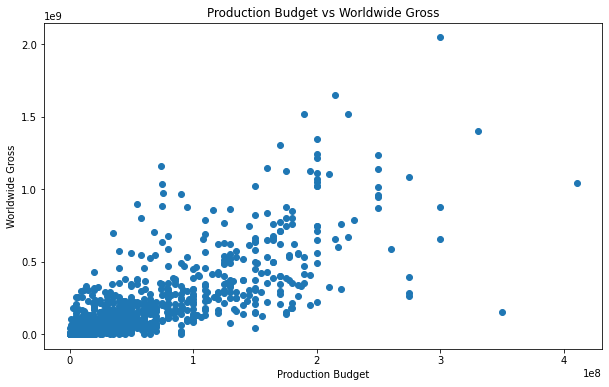

In [40]:
#compare production budget to WORLDWIDE gross
scatter_title = "Production Budget vs Worldwide Gross"
ylabel = "Worldwide Gross"
xlabel = "Production Budget"

productiondomestic, ax = plt.subplots(figsize=(10,6))
yyyyy=movie_data["worldwide_gross"]
xxxxx=movie_data["production_budget"]

ax.scatter(xxxxx,yyyyy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)

In [41]:
movies_with_profit = movie_data.loc[movie_data["worldwide_gross"] != 0]
movies_with_profit

,tconst,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
0,tt1542344,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07
1,tt1484522,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05
2,tt1179056,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08
3,tt1014759,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09
4,tt1175709,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05
...,...,...,...,...,...,...,...,...,...
1365,tt5113040,2019 The Secret Life of Pets 2,2019,"Adventure,Animation,Comedy",6.6,3467,80000000.0,63795655.0,1.133515e+08
1366,tt1946502,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07
1367,tt9024106,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07
1369,tt7634968,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07


Text(0.5, 1.0, 'Production Budget vs Worldwide Gross (Profitable Movies Only)')

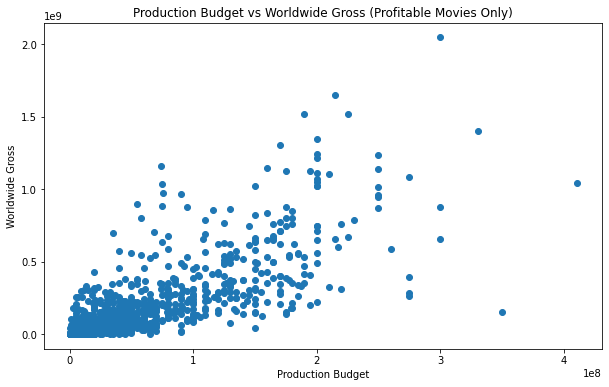

In [42]:
#compare production budget to WORLDWIDE gross, not including any movies with no profits
scatter_title = "Production Budget vs Worldwide Gross (Profitable Movies Only)"
ylabel = "Worldwide Gross"
xlabel = "Production Budget"

productiondomesticprofit, ax = plt.subplots(figsize=(10,6))
yyyyyy=movies_with_profit["worldwide_gross"]
xxxxxx=movies_with_profit["production_budget"]

ax.scatter(xxxxxx,yyyyyy)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(scatter_title)

In [43]:
movies_with_profit.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
averagerating,1.000000,0.503474,0.184605,0.303401,0.287384
numvotes,0.503474,1.000000,0.525941,0.656937,0.643272
production_budget,0.184605,0.525941,1.000000,0.701121,0.779163
domestic_gross,0.303401,0.656937,0.701121,1.000000,0.941765
worldwide_gross,0.287384,0.643272,0.779163,0.941765,1.000000


There is almost a perfect correlation between domestic gross and worldwide gross. 

A very strong correlation between production budget and your profits, domestic and worldwide - with stronger relationship between production budget and worldwide profit

In [44]:
movies_with_profit["d_profit"] = movies_with_profit["domestic_gross"] - movies_with_profit["production_budget"]
movies_with_profit

<ipython-input-44-060001520960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_profit["d_profit"] = movies_with_profit["domestic_gross"] - movies_with_profit["production_budget"]


,tconst,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit
0,tt1542344,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07,335230.0
1,tt1484522,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05,-2399720.0
2,tt1179056,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08,28075011.0
3,tt1014759,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09,134191110.0
4,tt1175709,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05,-19417976.0
...,...,...,...,...,...,...,...,...,...,...
1365,tt5113040,2019 The Secret Life of Pets 2,2019,"Adventure,Animation,Comedy",6.6,3467,80000000.0,63795655.0,1.133515e+08,-16204345.0
1366,tt1946502,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07,-25105336.0
1367,tt9024106,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07,12107621.0
1369,tt7634968,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07,34611903.0


In [45]:
movies_with_profit["w_profit"] = movies_with_profit["worldwide_gross"] - movies_with_profit["production_budget"]
movies_with_profit

<ipython-input-45-d5b0e16c7566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_profit["w_profit"] = movies_with_profit["worldwide_gross"] - movies_with_profit["production_budget"]


,tconst,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit
0,tt1542344,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07,335230.0,42217171.0
1,tt1484522,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05,-2399720.0,-2399720.0
2,tt1179056,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08,28075011.0,82729621.0
3,tt1014759,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09,134191110.0,825491110.0
4,tt1175709,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05,-19417976.0,-19126383.0
...,...,...,...,...,...,...,...,...,...,...,...
1365,tt5113040,2019 The Secret Life of Pets 2,2019,"Adventure,Animation,Comedy",6.6,3467,80000000.0,63795655.0,1.133515e+08,-16204345.0,33351496.0
1366,tt1946502,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07,-25105336.0,-20355336.0
1367,tt9024106,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07,12107621.0,12107621.0
1369,tt7634968,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07,34611903.0,49911903.0


In [46]:
movies_with_profit.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit
averagerating,1.000000,0.503474,0.184605,0.303401,0.287384,0.251990,0.294009
numvotes,0.503474,1.000000,0.525941,0.656937,0.643272,0.427269,0.625172
production_budget,0.184605,0.525941,1.000000,0.701121,0.779163,0.044691,0.651214
domestic_gross,0.303401,0.656937,0.701121,1.000000,0.941765,0.743664,0.935385
worldwide_gross,0.287384,0.643272,0.779163,0.941765,1.000000,0.588902,0.983093
d_profit,0.251990,0.427269,0.044691,0.743664,0.588902,1.000000,0.699929
w_profit,0.294009,0.625172,0.651214,0.935385,0.983093,0.699929,1.000000


In [47]:
#DETERMINE THE ROI, add Domestic and Worldwide ROI numbers to profitable movies dataframe

movies_with_profit["w_roi"] = movies_with_profit["worldwide_gross"] / movies_with_profit["production_budget"]
movies_with_profit["d_roi"] = movies_with_profit["domestic_gross"] / movies_with_profit["production_budget"]
movies_with_profit



<ipython-input-47-ef5a4e297eb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_profit["w_roi"] = movies_with_profit["worldwide_gross"] / movies_with_profit["production_budget"]
<ipython-input-47-ef5a4e297eb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_profit["d_roi"] = movies_with_profit["domestic_gross"] / movies_with_profit["production_budget"]


,tconst,merge_id,release_date,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit,w_roi,d_roi
0,tt1542344,2010 127 Hours,2010,"Adventure,Biography,Drama",7.6,323949,18000000.0,18335230.0,6.021717e+07,335230.0,42217171.0,3.345398,1.018624
1,tt1484522,2010 8: The Mormon Proposition,2010,Documentary,7.0,1190,2500000.0,100280.0,1.002800e+05,-2399720.0,-2399720.0,0.040112,0.040112
2,tt1179056,2010 A Nightmare on Elm Street,2010,"Crime,Drama,Horror",5.2,85497,35000000.0,63075011.0,1.177296e+08,28075011.0,82729621.0,3.363703,1.802143
3,tt1014759,2010 Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.5,358813,200000000.0,334191110.0,1.025491e+09,134191110.0,825491110.0,5.127456,1.670956
4,tt1175709,2010 All Good Things,2010,"Crime,Drama,Mystery",6.3,49684,20000000.0,582024.0,8.736170e+05,-19417976.0,-19126383.0,0.043681,0.029101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,tt5113040,2019 The Secret Life of Pets 2,2019,"Adventure,Animation,Comedy",6.6,3467,80000000.0,63795655.0,1.133515e+08,-16204345.0,33351496.0,1.416894,0.797446
1366,tt1946502,2019 UglyDolls,2019,"Adventure,Animation,Comedy",4.5,1176,45000000.0,19894664.0,2.464466e+07,-25105336.0,-20355336.0,0.547659,0.442104
1367,tt9024106,2019 Unplanned,2019,"Biography,Drama",6.3,5945,6000000.0,18107621.0,1.810762e+07,12107621.0,12107621.0,3.017937,3.017937
1369,tt7634968,2019 What Men Want,2019,"Comedy,Fantasy,Romance",4.9,10141,20000000.0,54611903.0,6.991190e+07,34611903.0,49911903.0,3.495595,2.730595


## Budget and Genres Analysis

- Starting to combine Budget and 

In [48]:
genre = movies_with_profit
split = genre['genres'].str.split(",", expand = True)
genre['one']= split[0]
genre['two']= split[1]
genre['three']= split[2]


<ipython-input-48-41fbc1e7093e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre['one']= split[0]
<ipython-input-48-41fbc1e7093e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre['two']= split[1]
<ipython-input-48-41fbc1e7093e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [49]:
g1 = genre[['averagerating', 'numvotes', 'production_budget', 'domestic_gross', 'worldwide_gross','d_profit','w_profit', 'w_roi', "d_roi", 'one']].rename(columns={'one':'genre'})
g2 = genre[['averagerating', 'numvotes', 'production_budget', 'domestic_gross', 'worldwide_gross','d_profit','w_profit', 'w_roi', "d_roi", 'two']].rename(columns={'two':'genre'})
g3 = genre[['averagerating', 'numvotes', 'production_budget', 'domestic_gross', 'worldwide_gross','d_profit','w_profit', 'w_roi', "d_roi", 'three']].rename(columns={'three':'genre'})
genres_list = [g1, g2, g3]
genres = pd.concat(genres_list)
genres.dropna(inplace=True)

In [50]:
genres

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,d_profit,w_profit,w_roi,d_roi,genre
0,7.6,323949,18000000.0,18335230.0,6.021717e+07,335230.0,42217171.0,3.345398,1.018624,Adventure
1,7.0,1190,2500000.0,100280.0,1.002800e+05,-2399720.0,-2399720.0,0.040112,0.040112,Documentary
2,5.2,85497,35000000.0,63075011.0,1.177296e+08,28075011.0,82729621.0,3.363703,1.802143,Crime
3,6.5,358813,200000000.0,334191110.0,1.025491e+09,134191110.0,825491110.0,5.127456,1.670956,Adventure
4,6.3,49684,20000000.0,582024.0,8.736170e+05,-19417976.0,-19126383.0,0.043681,0.029101,Crime
...,...,...,...,...,...,...,...,...,...,...
1364,7.4,10383,25000000.0,0.0,5.227233e+06,-25000000.0,-19772767.0,0.209089,0.000000,Mystery
1365,6.6,3467,80000000.0,63795655.0,1.133515e+08,-16204345.0,33351496.0,1.416894,0.797446,Comedy
1366,4.5,1176,45000000.0,19894664.0,2.464466e+07,-25105336.0,-20355336.0,0.547659,0.442104,Comedy
1369,4.9,10141,20000000.0,54611903.0,6.991190e+07,34611903.0,49911903.0,3.495595,2.730595,Romance


In [51]:
genres["genre"].value_counts()

Drama          612
Comedy         463
Action         396
Adventure      327
Thriller       213
Crime          203
Romance        174
Horror         136
Biography      120
Sci-Fi         116
Fantasy        113
Mystery        107
Animation       95
Family          81
Music           44
History         37
Sport           26
Documentary     25
War             15
Western          9
Musical          6
Name: genre, dtype: int64

In [52]:
genres['genre'][1363]

1363      Horror
1363    Thriller
Name: genre, dtype: object

In [53]:
import seaborn as sns

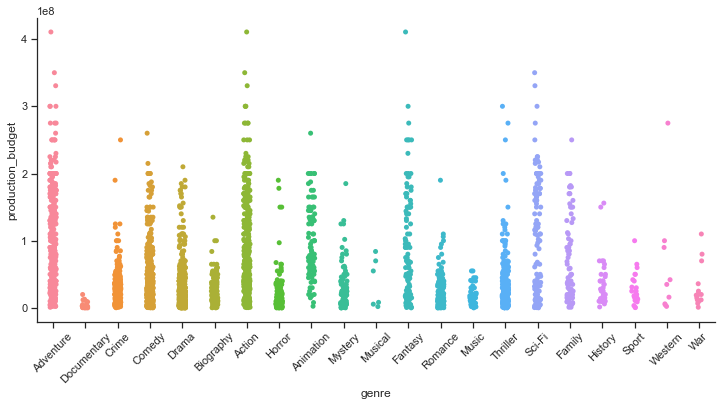

In [54]:
# plot comparing genres of profitable movies vs their production budgets
production = genres[['production_budget', 'genre']]
sns.set_theme(style = "ticks", color_codes = True)
sns.catplot(x='genre', y='production_budget', data = production, aspect=20/10)
plt.xticks(rotation = 45);

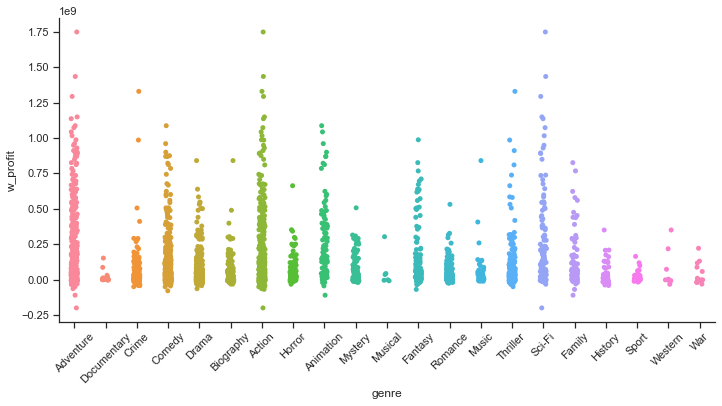

In [55]:
wprofit = genres[['w_profit', 'genre']]
sns.set_theme(style = "ticks", color_codes = True)
sns.catplot(x='genre', y='w_profit', data = wprofit, aspect=20/10)
plt.xticks(rotation = 45);

In [56]:
genres.to_csv('genres')

## Analyzing Profitability and Genres

In [57]:
#grouping by genres to assertain how successful particular genres are and link them to certain metrics

genres_t = genres

In [58]:
genres_t = genres.groupby(by=["genre"]).describe().T

In [1]:
genres_mean = genres.groupby(by=["genre"]).mean()

NameError: name 'genres' is not defined

In [77]:
genres_mean

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
averagerating,6.386869e+00,6.480734e+00,6.547368e+00,7.073333e+00,6.242981e+00,6.426108e+00,6.672000e+00,6.610294e+00,6.145679e+00,6.141593e+00,...,5.666176e+00,6.350000e+00,6.000000e+00,6.152336e+00,6.331034e+00,6.603448e+00,6.930769e+00,6.128169e+00,6.640000e+00,6.766667e+00
numvotes,1.935170e+05,2.065735e+05,1.206541e+05,1.183090e+05,9.745535e+04,1.243245e+05,1.077548e+04,1.096388e+05,8.169011e+04,1.564324e+05,...,7.592949e+04,7.318807e+04,6.260150e+04,1.378484e+05,8.421243e+04,2.975070e+05,7.750673e+04,1.380788e+05,8.313220e+04,2.177066e+05
production_budget,8.623990e+07,1.101544e+08,9.856842e+07,2.647058e+07,4.221680e+07,3.407645e+07,3.767920e+06,2.837114e+07,7.162840e+07,8.830398e+07,...,2.059658e+07,1.904545e+07,3.748333e+07,2.732928e+07,2.353371e+07,1.041006e+08,2.746154e+07,3.672776e+07,3.052000e+07,6.342222e+07
domestic_gross,9.610946e+07,1.277712e+08,1.353075e+08,4.179543e+07,6.135829e+07,3.930877e+07,1.268088e+07,3.531525e+07,7.906330e+07,8.237552e+07,...,3.445891e+07,3.801103e+07,4.277686e+07,4.098905e+07,3.444648e+07,1.385372e+08,3.632739e+07,4.938168e+07,2.650965e+07,5.900548e+07
worldwide_gross,2.651108e+08,3.620707e+08,3.745825e+08,8.628918e+07,1.399688e+08,8.777435e+07,1.714562e+07,7.778563e+07,1.949254e+08,2.428880e+08,...,7.766170e+07,8.251811e+07,9.826864e+07,9.734625e+07,7.163014e+07,3.814830e+08,5.418909e+07,1.319584e+08,6.458118e+07,1.279120e+08
d_profit,9.869557e+06,1.761676e+07,3.673906e+07,1.532484e+07,1.914148e+07,5.232321e+06,8.912958e+06,6.944106e+06,7.434909e+06,-5.928463e+06,...,1.386232e+07,1.896557e+07,5.293525e+06,1.365977e+07,1.091277e+07,3.443651e+07,8.865848e+06,1.265393e+07,-4.010346e+06,-4.416747e+06
w_profit,1.788709e+08,2.519162e+08,2.760140e+08,5.981860e+07,9.775204e+07,5.369790e+07,1.337770e+07,4.941448e+07,1.232970e+08,1.545841e+08,...,5.706512e+07,6.347265e+07,6.078531e+07,7.001697e+07,4.809644e+07,2.773823e+08,2.672756e+07,9.523064e+07,3.406118e+07,6.448982e+07
w_roi,2.819903e+00,3.169351e+00,3.734554e+00,3.611556e+00,3.276781e+00,2.293179e+00,3.176817e+00,3.382059e+00,2.692664e+00,3.234398e+00,...,1.079627e+01,3.815071e+00,2.223572e+00,1.047662e+01,3.697123e+00,3.771371e+00,1.906432e+00,7.031586e+00,1.477372e+00,1.875478e+00
d_roi,1.135014e+00,1.220756e+00,1.401851e+00,1.846571e+00,1.757953e+00,1.191512e+00,2.288999e+00,1.763976e+00,1.461552e+00,1.446741e+00,...,5.579037e+00,1.931172e+00,6.500285e-01,5.093471e+00,2.105752e+00,1.593837e+00,1.424698e+00,3.358698e+00,6.403844e-01,1.025090e+00


In [84]:
genres_median = genres.groupby(by=["genre"]).median()
avgrtg=genre['averagerating']

In [98]:
droi_by_genre = genres_t.loc["averagerating"]

In [99]:
droigenre = droi_by_genre.loc['50%'].sort_values(ascending = False)
droigenre.sort_values(ascending = False)

genre
Biography      7.20
History        7.10
Sport          7.10
Documentary    6.90
Drama          6.70
Animation      6.70
Western        6.60
Sci-Fi         6.60
Adventure      6.50
Crime          6.50
Music          6.40
Romance        6.40
Action         6.40
War            6.30
Family         6.30
Mystery        6.30
Comedy         6.30
Thriller       6.30
Fantasy        6.20
Musical        6.15
Horror         5.80
Name: 50%, dtype: float64

In [64]:
# most frequently made genres
#documentary has one of highest ROIs, hgihest ratings, less saturated market due to lower # count
# highest average ROI genres
# family has very high number of votes,, lots of people watching these, very popular

In [65]:
### TRYING TO: gather the genres that are not over saturated, aka have a lower "count". then see which ones have highest ratings
genres_count = genres["genre"].count()
genres_count
#droi_by_lowcount_and_rating = genres_count.loc["averagerating"]


3318

In [66]:
average_rating = genres_t.loc["averagerating"].T
average_rating[average_rating["count"] < 300]

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Animation,95.0,6.547368,1.064799,1.9,6.100,6.70,7.250,8.4
Biography,120.0,7.073333,0.680674,4.6,6.700,7.20,7.500,8.5
Crime,203.0,6.426108,0.871074,3.6,5.850,6.50,7.000,8.3
Documentary,25.0,6.672000,1.332141,1.6,6.400,6.90,7.200,8.4
Family,81.0,6.145679,0.980440,3.8,5.600,6.30,6.900,8.0
Fantasy,113.0,6.141593,0.848710,4.2,5.500,6.20,6.700,7.9
History,37.0,6.994595,0.691193,5.2,6.500,7.10,7.400,8.1
Horror,136.0,5.666176,0.924580,3.2,5.100,5.80,6.300,7.7
Music,44.0,6.350000,1.087883,1.6,5.875,6.40,6.900,8.5


In [67]:
droi_by_lowcount_and_rating.sort_values()

NameError: name 'droi_by_lowcount_and_rating' is not defined

In [ ]:
quickgroup = genres.groupby(["genre"])["d_roi","averagerating","numvotes"].mean()
quickgroup.sort_values("d_roi", ascending=False)

In [ ]:
quickgroup = genres.groupby(["genre"])["d_roi","averagerating","numvotes"].median()
quickgroup.sort_values("averagerating", ascending=False)

# Talent